[View in Colaboratory](https://colab.research.google.com/github/ckr77/Fashion_MINST_CNN/blob/master/FirstCNN_NoRegularization.ipynb)

In [0]:
!pip install -q -U tensorflow>=1.8.0

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


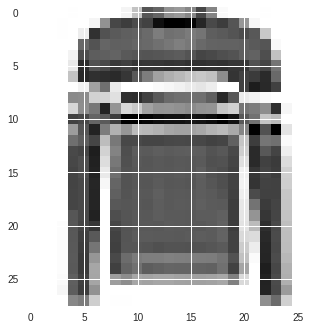

In [19]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [21]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [22]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [23]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               401664    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total para

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [25]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
44288/55000 [=======================>......] - ETA: 13s - loss: 0.4765 - acc: 0.8281

55000/55000 [==============================] - 71s 1ms/step - loss: 0.4517 - acc: 0.8374 - val_loss: 0.3553 - val_acc: 0.8708

Epoch 00001: val_loss improved from inf to 0.35526, saving model to model.weights.best.hdf5
Epoch 2/10
17408/55000 [========>.....................] - ETA: 51s - loss: 0.3150 - acc: 0.8856

55000/55000 [==============================] - 74s 1ms/step - loss: 0.2986 - acc: 0.8916 - val_loss: 0.2749 - val_acc: 0.8980

Epoch 00002: val_loss improved from 0.35526 to 0.27487, saving model to model.weights.best.hdf5
Epoch 3/10
10112/55000 [====>.........................] - ETA: 55s - loss: 0.2580 - acc: 0.9050

55000/55000 [==============================] - 72s 1ms/step - loss: 0.2551 - acc: 0.9070 - val_loss: 0.2484 - val_acc: 0.9106

Epoch 00003: val_loss improved from 0.27487 to 0.24843, saving model to model.weights.best.hdf5
Epoch 4/10
 8192/55000 [===>..........................] - ETA: 1:00 - loss: 0.2391 - acc: 0.9106

55000/55000 [==============================] - 74s 1ms/step - loss: 0.2280 - acc: 0.9159 - val_loss: 0.2529 - val_acc: 0.9068

Epoch 00004: val_loss did not improve from 0.24843
Epoch 5/10
 8960/55000 [===>..........................] - ETA: 1:00 - loss: 0.1995 - acc: 0.9268

55000/55000 [==============================] - 72s 1ms/step - loss: 0.2030 - acc: 0.9250 - val_loss: 0.2366 - val_acc: 0.9136

Epoch 00005: val_loss improved from 0.24843 to 0.23656, saving model to model.weights.best.hdf5
Epoch 6/10
 7872/55000 [===>..........................] - ETA: 58s - loss: 0.1808 - acc: 0.9336

55000/55000 [==============================] - 70s 1ms/step - loss: 0.1837 - acc: 0.9319 - val_loss: 0.2505 - val_acc: 0.9074

Epoch 00006: val_loss did not improve from 0.23656
Epoch 7/10
 8896/55000 [===>..........................] - ETA: 57s - loss: 0.1684 - acc: 0.9385

55000/55000 [==============================] - 69s 1ms/step - loss: 0.1652 - acc: 0.9390 - val_loss: 0.2192 - val_acc: 0.9218

Epoch 00007: val_loss improved from 0.23656 to 0.21924, saving model to model.weights.best.hdf5
Epoch 8/10
 7872/55000 [===>..........................] - ETA: 58s - loss: 0.1388 - acc: 0.9520

55000/55000 [==============================] - 69s 1ms/step - loss: 0.1475 - acc: 0.9458 - val_loss: 0.2176 - val_acc: 0.9218

Epoch 00008: val_loss improved from 0.21924 to 0.21756, saving model to model.weights.best.hdf5
Epoch 9/10
 7616/55000 [===>..........................] - ETA: 57s - loss: 0.1310 - acc: 0.9500

55000/55000 [==============================] - 69s 1ms/step - loss: 0.1298 - acc: 0.9521 - val_loss: 0.2403 - val_acc: 0.9186

Epoch 00009: val_loss did not improve from 0.21756
Epoch 10/10
 8768/55000 [===>..........................] - ETA: 56s - loss: 0.1106 - acc: 0.9603

55000/55000 [==============================] - 68s 1ms/step - loss: 0.1156 - acc: 0.9572 - val_loss: 0.2300 - val_acc: 0.9206

Epoch 00010: val_loss did not improve from 0.21756


In [0]:
# Load the weights with the best validation accuracy
model.load_weights('model.weights.best.hdf5')

In [27]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.917


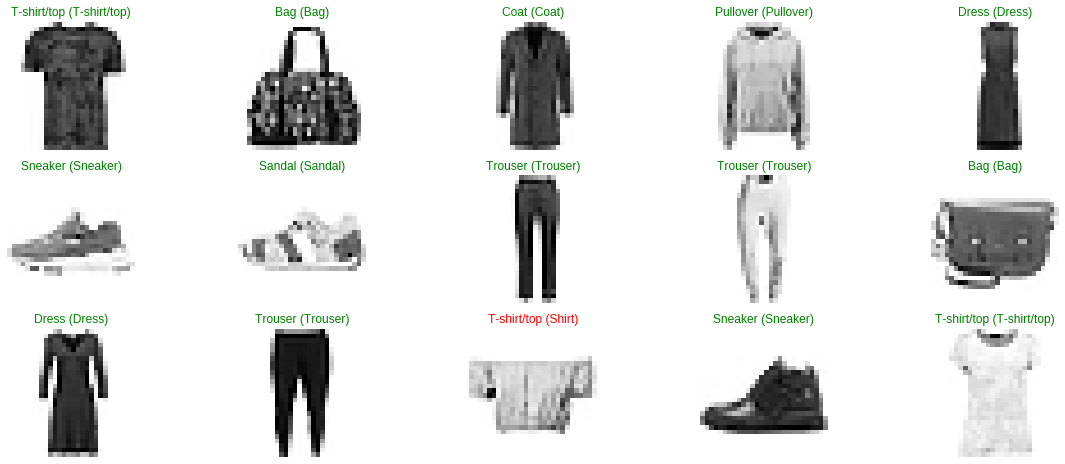

In [28]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))